# **Data Preprocessing**

## Imports

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier



## Data Loading

In [50]:
current_dir = os.getcwd()

# Go up two levels to reach the project root
project_root = os.path.abspath(os.path.join(current_dir, "../.."))

#  raw data path
data = os.path.join(project_root, "data")
excel_file = os.path.join(data, "INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
df = pd.read_excel(excel_file) 
output_path = os.path.join(project_root, "data", "processed_employee_data.csv")
pipeline_path = os.path.join(project_root, "models", "preprocessor.pkl")
os.makedirs(os.path.dirname(pipeline_path), exist_ok=True)

## Basic checks

In [51]:
df.head() 

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [52]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [54]:
df.describe(include='all')

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
count,1200,1200.000000,1200,1200,1200,1200,1200,1200,1200.000000,1200.00000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200.000000
unique,1200,NaN,2,6,3,6,19,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,E100967,NaN,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,1,NaN,725,492,548,373,270,846,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022,NaN
mean,NaN,36.918333,NaN,NaN,NaN,NaN,NaN,NaN,9.165833,2.89250,...,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,NaN,2.948333
std,NaN,9.087289,NaN,NaN,NaN,NaN,NaN,NaN,8.176636,1.04412,...,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,NaN,0.518866
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.00000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000
25%,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.00000,...,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN,3.000000
50%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.00000,...,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN,3.000000
75%,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,4.00000,...,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,NaN,3.000000


## **`DATA PREPROCESSING`**


In [55]:
df_clean = df.copy()

### Handling missing values

In [56]:
df_clean.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

- There are no missing values in the data.

### Handling duplicates

In [57]:
df_clean.duplicated().sum()

np.int64(0)

- There are no duplicates in the data

### Outlier Handling

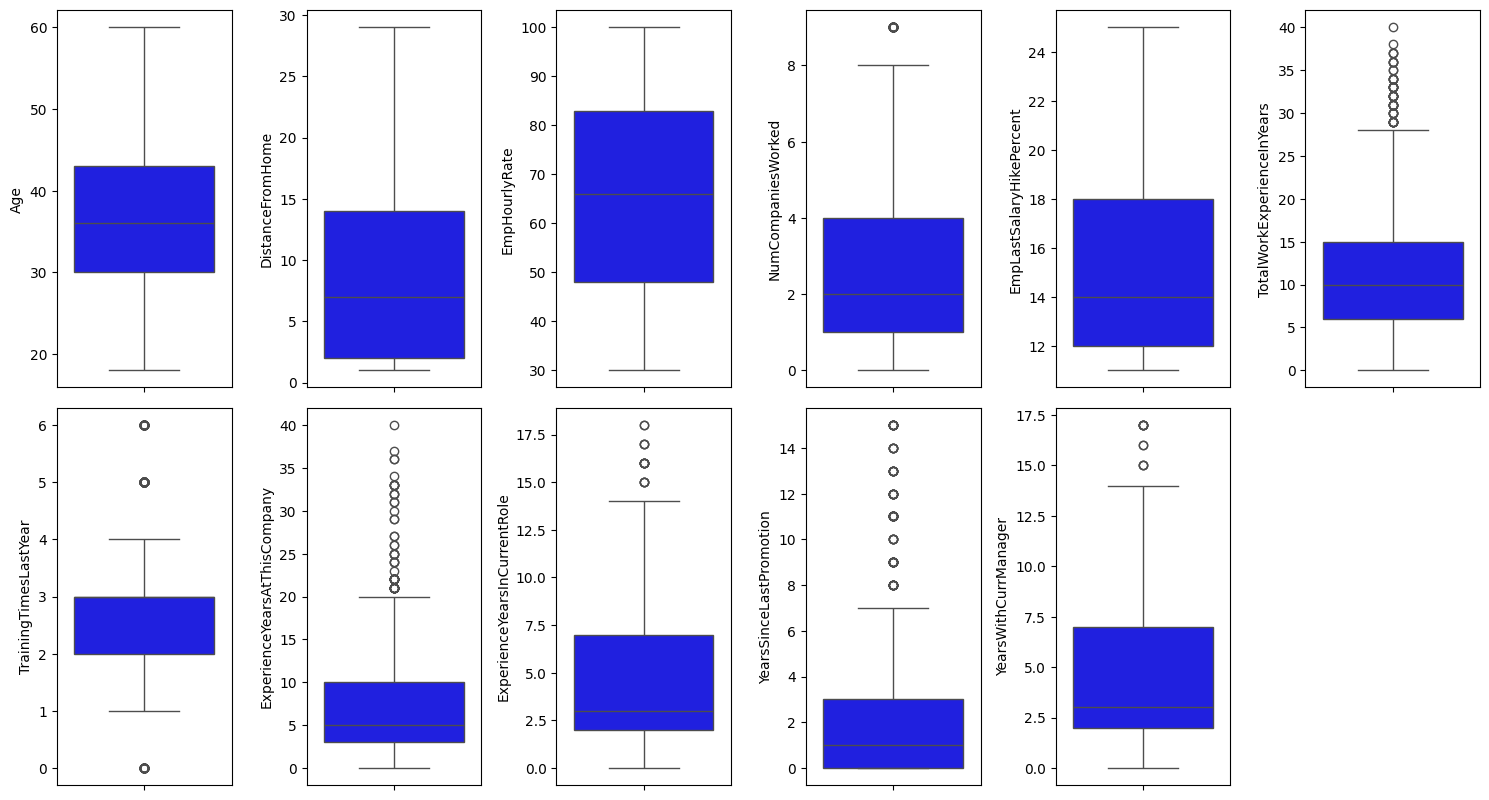

In [58]:
numeric_cols = df_clean[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent',
                    'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                    'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(15,20))                
plotnumber = 1
for i in numeric_cols :
    plt.subplot(5,6,plotnumber)
    sns.boxplot(df_clean[i],color='b')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

In [59]:
def handle_outliers(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Winsorization
    df_clean[column] = df_clean[column].clip(lower=lower_bound, upper=upper_bound)
    return df_clean

for i in numeric_cols:
    df_clean = handle_outliers(df_clean, i)

### Encoding

In [60]:
# Manual Binary Encoding
df_clean['Gender'] = df_clean['Gender'].map({'Male':1, 'Female':0})
df_clean['OverTime'] = df_clean['OverTime'].map({'No':0, 'Yes':1})
df_clean['Attrition'] = df_clean['Attrition'].map({'No':0, 'Yes':1})
df_clean['PerformanceRating'] = df_clean['PerformanceRating'].map({2:0, 3:1, 4:2})

In [61]:
# One-Hot Encoding 
one_hot_cols = ['EducationBackground', 'MaritalStatus', 'EmpDepartment', 'BusinessTravelFrequency']
df_clean = pd.get_dummies(df_clean, columns=one_hot_cols, drop_first=True,dtype=int)

In [62]:
# Label Encoding 
le = LabelEncoder()
df_clean['EmpJobRole'] = le.fit_transform(df_clean['EmpJobRole'])

In [63]:
df_clean.head()

,EmpNumber,Age,Gender,EmpJobRole,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,...,EducationBackground_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Human Resources,EmpDepartment_Research & Development,EmpDepartment_Sales,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,E1001000,32,1,13,10,3,4,55,3,2,...,0,0,1,0,0,0,0,1,0,1
1,E1001006,47,1,13,14,4,4,42,3,2,...,0,0,1,0,0,0,0,1,0,1
2,E1001007,40,1,13,5,4,4,48,2,3,...,0,1,0,0,0,0,0,1,1,0
3,E1001009,41,1,8,10,4,2,73,2,5,...,0,0,0,0,0,1,0,0,0,1
4,E1001010,60,1,13,16,4,1,84,3,2,...,0,0,1,0,0,0,0,1,0,1


In [64]:
df_clean.drop('EmpNumber',axis = 1,inplace = True)

## Feature Selection

In [65]:
# Separate target and features
X = df_clean.drop('PerformanceRating', axis=1)
y = df_clean['PerformanceRating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

EmpLastSalaryHikePercent        0.191966
EmpEnvironmentSatisfaction      0.187242
YearsSinceLastPromotion         0.082802
ExperienceYearsInCurrentRole    0.042158
EmpHourlyRate                   0.039344
EmpJobRole                      0.037209
Age                             0.034498
YearsWithCurrManager            0.033078
ExperienceYearsAtThisCompany    0.031480
DistanceFromHome                0.030568
TotalWorkExperienceInYears      0.029530
EmpDepartment_Development       0.026737
EmpWorkLifeBalance              0.026195
NumCompaniesWorked              0.020873
TrainingTimesLastYear           0.018477
EmpEducationLevel               0.017673
EmpJobSatisfaction              0.017495
EmpRelationshipSatisfaction     0.016599
EmpJobInvolvement               0.014222
EmpJobLevel                     0.013388
dtype: float64


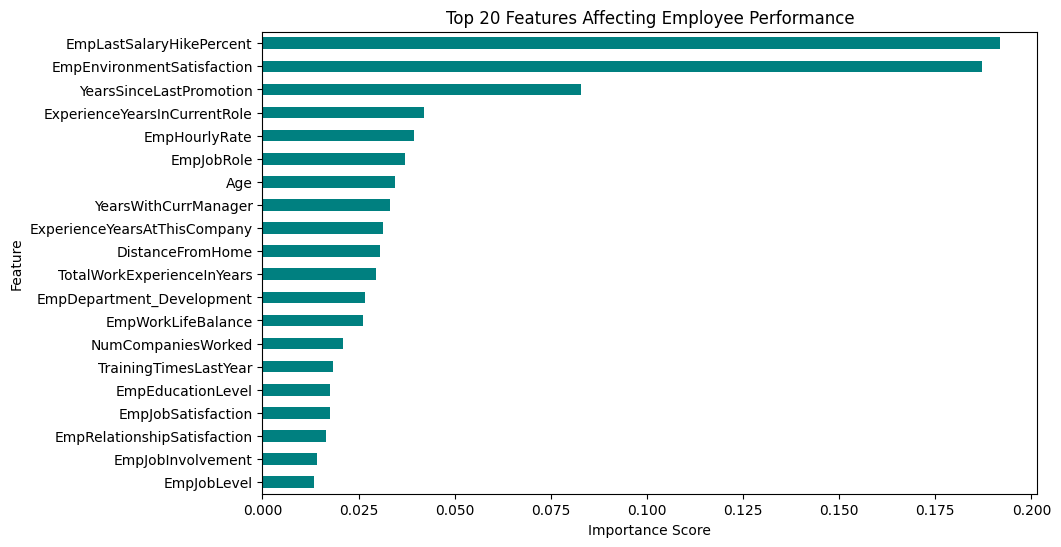

In [66]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(20)
print(top_features)

# Visualization
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='teal')
plt.title("Top 20 Features Affecting Employee Performance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


- **Top Predictive Features:**
    These three features has a highest predictive power of all features:

    - EmpLastSalaryHikePercent
    - EmpEnvironmentSatisfaction
    - YearsSinceLastPromotion

### Converting to csv

In [67]:
selected_features = [
    c for c in df_clean.columns 
    if any(tf.replace('PerformanceRating', '') == c for tf in top_features.index)
]
df_selected = df_clean[selected_features + ['PerformanceRating']]


In [68]:
df_selected.head()


,Age,EmpJobRole,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpDepartment_Development,PerformanceRating
0,32,13,10,3,4,55,3,2,4,1.0,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0,1
1,47,13,14,4,4,42,3,2,1,2.0,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0,1
2,40,13,5,4,4,48,2,3,1,5.0,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0,2
3,41,8,10,4,2,73,2,5,4,3.0,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0,1
4,60,13,16,4,1,84,3,2,1,8.0,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0,1


In [69]:
csv_file = os.path.join(data, "preprocessed_data.csv")
df_selected.to_csv(csv_file, index=False)